In [55]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [15]:
df=pd.read_csv("titanic.csv")

In [16]:
len(df)

891

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
df[df["Age"].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [20]:
df["Age"].mean()

29.69911764705882

In [21]:
row=df["Age"]
row
for i in range(891):
    if math.isnan(row[i]):
        row[i]=row.mean()

c:\users\gaurav ghosh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
row[row.isnull()==True]

Series([], Name: Age, dtype: float64)

In [23]:
row=row.astype(int)
row

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [24]:
df[df["Age"].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [25]:
df[df["Pclass"].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [26]:
df[df["Sex"].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
df[df["Fare"].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [28]:
df[df["Embarked"].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [29]:
df[df["Embarked"]=='S']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S


In [30]:
row1=df["Embarked"]
for i in range(891):
    if i==61 or i==829:
        row1[i]='S'

c:\users\gaurav ghosh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
df[df["Embarked"].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [90]:
real_x=df[["Pclass","Sex","Fare","SibSp","Parch"]]

In [91]:
real_x

,Pclass,Sex,Fare,SibSp,Parch
0,3,male,7.2500,1,0
1,1,female,71.2833,1,0
2,3,female,7.9250,0,0
3,1,female,53.1000,1,0
4,3,male,8.0500,0,0
...,...,...,...,...,...
886,2,male,13.0000,0,0
887,1,female,30.0000,0,0
888,3,female,23.4500,1,2
889,1,male,30.0000,0,0


In [92]:
real_x["Age_n"]=row
real_x["Embarked_n"]=row1

c:\users\gaurav ghosh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\gaurav ghosh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
real_x

,Pclass,Sex,Fare,SibSp,Parch,Age_n,Embarked_n
0,3,male,7.2500,1,0,22,S
1,1,female,71.2833,1,0,38,C
2,3,female,7.9250,0,0,26,S
3,1,female,53.1000,1,0,35,S
4,3,male,8.0500,0,0,35,S
...,...,...,...,...,...,...,...
886,2,male,13.0000,0,0,27,S
887,1,female,30.0000,0,0,19,S
888,3,female,23.4500,1,2,29,S
889,1,male,30.0000,0,0,26,C


In [94]:
real_x.dtypes

Pclass          int64
Sex            object
Fare          float64
SibSp           int64
Parch           int64
Age_n           int32
Embarked_n     object
dtype: object

In [95]:
real_x["Embarked_n"].astype("category")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked_n, Length: 891, dtype: category
Categories (3, object): [C, Q, S]

In [97]:
X=pd.get_dummies(real_x,columns=["Sex","Pclass","Embarked_n","SibSp","Parch"])
X

,Fare,Age_n,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_n_C,Embarked_n_Q,Embarked_n_S,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,7.2500,22,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,71.2833,38,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,7.9250,26,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,53.1000,35,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,8.0500,35,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,13.0000,27,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
887,30.0000,19,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
888,23.4500,29,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
889,30.0000,26,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [98]:
X.dtypes

Fare            float64
Age_n             int32
Sex_female        uint8
Sex_male          uint8
Pclass_1          uint8
Pclass_2          uint8
Pclass_3          uint8
Embarked_n_C      uint8
Embarked_n_Q      uint8
Embarked_n_S      uint8
SibSp_0           uint8
SibSp_1           uint8
SibSp_2           uint8
SibSp_3           uint8
SibSp_4           uint8
SibSp_5           uint8
SibSp_8           uint8
Parch_0           uint8
Parch_1           uint8
Parch_2           uint8
Parch_3           uint8
Parch_4           uint8
Parch_5           uint8
Parch_6           uint8
dtype: object

In [99]:
#le=LabelEncoder()
#real_x["Sex"]=le.fit_transform(real_x["Sex"])
#real_x["Embarked_n"]=le.fit_transform(real_x["Embarked_n"])

In [100]:
X

,Fare,Age_n,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_n_C,Embarked_n_Q,Embarked_n_S,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,7.2500,22,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,71.2833,38,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,7.9250,26,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,53.1000,35,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,8.0500,35,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,13.0000,27,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
887,30.0000,19,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
888,23.4500,29,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
889,30.0000,26,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [101]:
real_y=df.iloc[:,1:2]

In [102]:
a=df["Survived"]
a.astype("category")

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

In [103]:
real_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [104]:
training_x,testing_x,training_y,testing_y=train_test_split(X,real_y,test_size=.2,random_state=0)

In [105]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(training_x,training_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

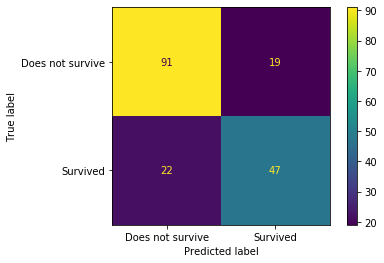

In [106]:
plot_confusion_matrix(dtc, testing_x, testing_y, display_labels=["Does not survive", "Survived"])

In [107]:
(91/(91+19))*100

82.72727272727273

In [108]:
(47/(47+22))*100

68.11594202898551

In [109]:
path = dtc.cost_complexity_pruning_path(training_x, training_y)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtc.fit(training_x, training_y)
    clf_dts.append(dtc)

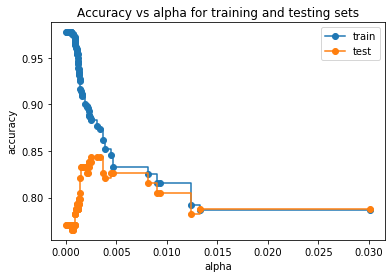

In [110]:
train_scores = [clf_dt.score(training_x, training_y) for clf_dt in clf_dts]
test_scores = [clf_dt.score(testing_x, testing_y) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

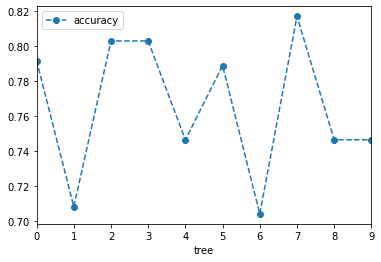

In [111]:
dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=0.013)
scores = cross_val_score(dtc, training_x, training_y, cv=10)
dff = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

dff.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [112]:
scores[4]

0.7464788732394366

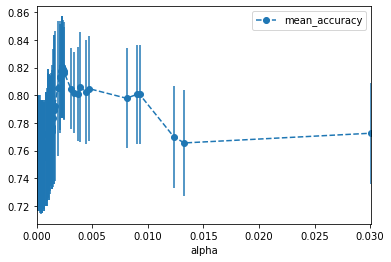

In [113]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dtc, training_x, training_y, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

In [121]:
alpha_results[(alpha_results["alpha"] > 0.002) & (alpha_results["alpha"] < 0.004)]

,alpha,mean_accuracy,std
52,0.002064,0.813243,0.040622
53,0.002107,0.813243,0.038102
54,0.002221,0.817469,0.034166
55,0.002308,0.820286,0.036804
56,0.002313,0.820286,0.036804
57,0.002324,0.820286,0.036804
58,0.002408,0.818858,0.035660
59,0.002463,0.817449,0.035431
60,0.002498,0.816060,0.033277
61,0.003081,0.804754,0.029288


In [122]:
ideal_ccp_alpha=alpha_results[(alpha_results["alpha"] > 0.002307) & (alpha_results["alpha"] < 0.002309)]["alpha"]
ideal_ccp_alpha

55    0.002308
Name: alpha, dtype: float64

In [123]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.002307676550961854

In [124]:
clf_dt_pruned = DecisionTreeClassifier(random_state=0, 
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(training_x, training_y) 

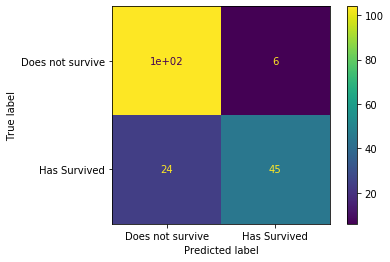

In [125]:
plot_confusion_matrix(clf_dt_pruned, 
                      testing_x, 
                      testing_y, 
                      display_labels=["Does not survive", "Has Survived"])

In [127]:
(100/106)*100

94.33962264150944

In [128]:
(45/(45+24))*100

65.21739130434783

[Text(368.6785714285714, 390.7125, 'Sex_male <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]\nclass = No survived'),
 Text(199.28571428571428, 356.73749999999995, 'Pclass_3 <= 0.5\ngini = 0.38\nsamples = 247\nvalue = [63, 184]\nclass = Yes survived'),
 Text(119.57142857142856, 322.7625, 'Age_n <= 2.5\ngini = 0.114\nsamples = 132\nvalue = [8, 124]\nclass = Yes survived'),
 Text(79.71428571428571, 288.78749999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No survived'),
 Text(159.42857142857142, 288.78749999999997, 'gini = 0.101\nsamples = 131\nvalue = [7, 124]\nclass = Yes survived'),
 Text(279.0, 322.7625, 'Fare <= 23.35\ngini = 0.499\nsamples = 115\nvalue = [55, 60]\nclass = Yes survived'),
 Text(239.1428571428571, 288.78749999999997, 'Age_n <= 29.5\ngini = 0.471\nsamples = 92\nvalue = [35, 57]\nclass = Yes survived'),
 Text(199.28571428571428, 254.81249999999997, 'Fare <= 7.888\ngini = 0.444\nsamples = 81\nvalue = [27, 54]\nclass = Yes survived'),
 Text(159.4285714

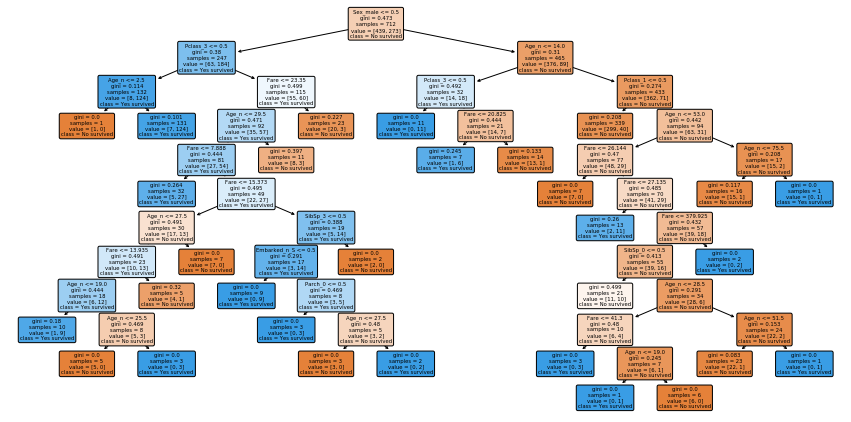

In [129]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No survived", "Yes survived"], 
          feature_names=X.columns) 